<a href="https://colab.research.google.com/github/maugsan/QnA-ngrams/blob/main/testing_ngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Question Answering System 
## Workflow

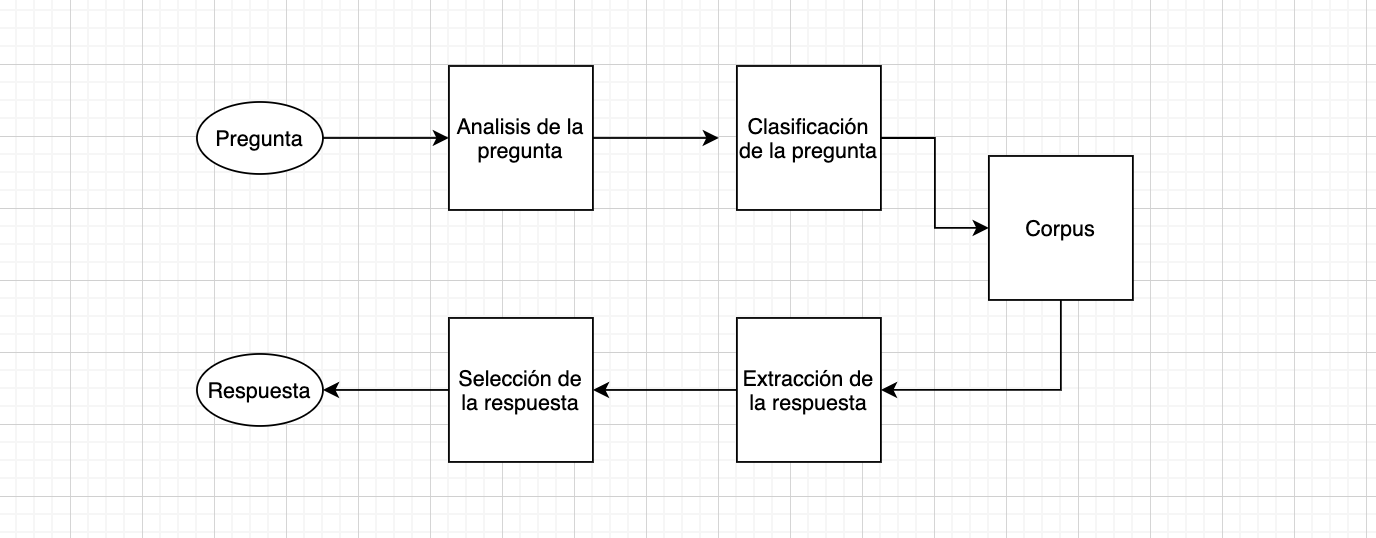

# **ENTRADA** : {Pregunta}

In [ ]:
import pickle
from nltk.tokenize import sent_tokenize
nltk.download('punkt')


nltk.data.clear_cache()
question = nltk.data.load('QnA/user_input.txt', format='text')
parts = nltk.sent_tokenize(question)


print( parts[0] )
print("\n")
print( parts[1] )
print( parts[2] )
print( parts[3] )
print( parts[4] )

with open('QnA/question.p', "wb") as f:
    pickle.dump(parts, f)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Which of the following examples applies Artificial Intelligence?


Voice recognition.
Fight against spam.
Robotics.
Automatic translation.


# 1. Análisis de la pregunta

# 2. Clasificación de la pregunta

In [ ]:
def classify_question(question):
    q = question.lower().split()
    if q[0] == 'where':
        return 'Location'
    if q[0] == 'which':
        return 'Term or Thing'
    elif 'year'  in question:
            return 'Date'
    elif 'time'  in question:
            return 'Time'
    elif 'country' in question:
        return 'Country'
    elif q[0] == 'who':
        return 'Person'
    elif q[0] == 'what':
        return 'Definition'
    else:
      return 'None'


question = []
with (open("QnA/question.p", "rb")) as openfile:
    while True:
        try:
            question.append(pickle.load(openfile))
        except EOFError:
            break

classify_question(question[0][0])

'Term or Thing'

# 3. Extracción de la *infomación*

In [ ]:

import nltk.data
import pickle
nltk.data.clear_cache()
corpus = nltk.data.load('QnA/chapter01.txt', format='text')

print(corpus)



# 4. Selección de respuestas


### Separación de oraciones(sentences)






In [ ]:
import re
from nltk.tokenize import sent_tokenize
nltk.data.clear_cache()
corpus = nltk.data.load('QnA/chapter01.txt', format='text')

# Split the text in array of sentences
sentences = nltk.sent_tokenize(corpus)

# Replace special characters
sentence_list = [re.sub(r"[^a-zA-Z ]", " ", temp) for temp in sentences]

with open('QnA/sentences.p', "wb") as f:
    pickle.dump(sentence_list, f)


# Print sentences filtered
for x in sentence_list:
  print("\n")
  print( x)






# 5. Análisis de las *respuestas*

In [ ]:
objects = []
with (open("QnA/question.p", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break


print( objects[0][0], objects[0][1])
print( objects[0][0], objects[0][2])
print( objects[0][0], objects[0][3])
print( objects[0][0], objects[0][4])
print( objects[0][0], objects[0][5])



Which of the following examples applies Artificial Intelligence? Voice recognition.
Which of the following examples applies Artificial Intelligence? Fight against spam.
Which of the following examples applies Artificial Intelligence? Robotics.
Which of the following examples applies Artificial Intelligence? Automatic translation.
Which of the following examples applies Artificial Intelligence? All the above are correct.


**Modelos N-Gramas**

Un modelo probabilístico del lenguaje define una distribución de la probabilidad sobre un conjunto (posiblemente infinito) de cadenas.
Dentro de esos modelos se encuentra el modelo N-Grama (de la raíz griega gramma que significa "cosa escrita") que especifica una secuencia de símbolos escritos de longitud n, con casos especiales "unigrama" para 1-grama, "bigrama" para 2-gramas y "trigrama" para 3-gramas.


In [32]:
from collections import Counter
from nltk import ngrams
from tabulate import tabulate
import pandas

texto = nltk.data.load('QnA/chapter01.txt', format='text')

bigrm = nltk.bigrams(texto.lower().split())

c = Counter(bigrm)

# for val, count in c.most_common(1000):
#     x , y = val;
#     print("{0} | {1} {2}".format(x, y, count))


result = pandas.DataFrame(c.most_common(),
                columns=['Bigram', 'Frequency'])
print(result)
rslt.to_csv('QnA/model.csv',index=False)
    
    

                    Bigram  Frequency
0                (of, the)         80
1                (in, the)         52
2                (to, the)         27
3                (on, the)         25
4             (the, first)         24
...                    ...        ...
9461         (show, later)          1
9462           (later, in)          1
9463       (chapter, that)          1
9464            (be, very)          1
9465  (very, intelligent.)          1

[9466 rows x 2 columns]


`# P(Sentence) = P(w1, w2, ..., wn)`

`# Esto se puede reducir a una secuencia de n-gramas usando la regla de la cadena de probabilidad condicional. `

`# P(x1, x2, ..., xn) = P(x1)P(x2|x1)...P(xn|x1,...xn-1)`


`# P('There was heavy rain') = P('There', 'was', 'heavy', 'rain')`
`# P('There was heavy rain') = P('There')P('was'|'There')P('heavy'|'There was')P('rain'|'There was heavy')`


In [ ]:
from collections import Counter
from nltk import ngrams
from tabulate import tabulate

texto = nltk.data.load('QnA/chapter01.txt', format='text')

bigrm = nltk.bigrams(texto.lower().split())

c = Counter(bigrm)


for val, count in c.most_common(1000):
    x , y = val;
    print("{0} | {1} {2}".format(x, y, count))
    

In [14]:

import math

import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk import *



def test(sentence):

  corpus = sentence
  tokens = WhitespaceTokenizer().tokenize(corpus.lower())
  bigrams = ngrams(tokens, 2)



  freq = nltk.FreqDist(bigrams)
  print('Top 15 Frequent Words in Bigram Model: \n'+str(freq.most_common(15)))
  print('\n')
  print('Unigram Probabilities: ')
  print(unigram_p)

  bigram_tuples = tuple(nltk.bigrams(tokens))
  for item in bigram_tuples:
              if item in bigram:
                  bigram[item] += 1
              else:
                  bigram[item] = 1

  for word in bigram:
      bigram_p[tuple(word)] = math.log(float(bigram[word]) / unigram[word[0]], 2)

  print('\n')
  print('Bigram Probabilities: ')
  print(bigram_p)



#test("It can choose to move left  move right  suck up the dirt  or do nothing ")
#test("Which of the following examples applies Artificial Intelligence? All the above are correct.")



sentence_list = []
with (open("QnA/sentences.p", "rb")) as openfile:
    while True:
        try:
            sentence_list.append(pickle.load(openfile))
        except EOFError:
            break


#for s in sentence_list[0]:
#  print(s + s)




# **SALIDA**: Respuesta